# COGS 108 - Final Project (Sleep in Mammals)

## Permissions

Place an `X` in the appropriate bracket below to specify if you would like your group's project to be made available to the public. (Note that student names will be included (but PIDs will be scraped from any groups who include their PIDs).

* [ X ] YES - make available
* [   ] NO - keep private

# Overview

In this project, we are going to examine the relationship between mammal properties, such as their body weight, life span, gestation, predation, exposure, and danger, and the sleep time of the mammal. According to our background research, many scientists have established connections between mammals' sleep patterns and certain bodily features and habits, including predation. Thus, amongst other factors, we are interested to explore whether predation has the most significant influence on sleep time. By analyzing the average coefficient, average p-values, average contribution, and Adjusted R-squared of linear regression models with all possible feature combinations after bootstrapping, we aim to explore whether our chosen feature is the strongest predictor.


# Names

- Chia-yu Chang (A15935893)
- Cecilia Liu (A15912399)
- Hannah Lin (A15999441)
- Jinyu Rao (A15625300)
- Lanzhuo Wu (A15581462)

<a id='research_question'></a>
# Research Question

*Do mammal properties (body weight, brain weight, life span, gestation, predation, exposure, danger) predict the sleeping time of an animal?*

<a id='background'></a>

## Background & Prior Work

One of our members used to take a class on the Psychology of Sleep. In the class, the professor mentioned that the total sleeping time for predators is significantly less than that of prey. This discovery sparked particular interest in her. Thus, having conducted some primary research and discovering a relevant dataset, we have decided to extend this interest and our project research question after we've found this dataset.

In the history of animal studies, scientists have conducted extensive research on animals' sleeping patterns, particularly on how a variety of factors influence sleeping time. They have discovered that other than feeding habits, other factors such as body size and life span of an animal might also have an impact on sleeping time. (1). In addition, other articles have probed deeper into how a specific feature relates to an animal's sleep time. For instance, it has been discovered that animals that are considered as prey tend to sleep less than their predators due to the increased risks involved during their sleeping time, particularly risks of attacks and seizures (2) (4). Furthermore, studies have shown that there exists a negative correlation between the body size and the sleep time of herbivores, which could be a possible explanation for the short sleeping time of elephants (3). Since most of the studies focus on mammalian research, we have decided to center our study on mammals as well.

Based on this information, we are interested in building a regression model to predict a mammal's sleeping time based on its properties and checking whether predation has the most significant influence on their sleeping time.


References (include links):
1. For How Many Hours Do Animals Sleep?
    http://school.sleepeducation.com/hoursanimalssleep.aspx 
    
2. Sleep Under the Risks of Predation 
    https://www.sciencedirect.com/science/article/abs/pii/S0003347205002009    
    
3. Inactivity/Sleep in two wild free-roaming African Elephant Matriarchs --- Does Large body size make elephants the 
    shortest mammalian sleepers? 
    https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5382951/
    
4. Sleep in mammals: ecological and constitutional correlates https://www.jstor.org/stable/1743947  

# Hypothesis


We hypothesize that the predation (an index of how likely the mammal is to be preyed upon) has the most significant influence on the prediction of mamallian sleep time among all the variables.

# Dataset(s)

The ideal dataset should include various general features of mammalian like the body weight, predation status etc. as the independent variables and the total sleep time as the dependent variable that we should predict on. It would be better if these data are collected by reliable scientific research teams and organized as semi-structured data in a CSV file.


Our dataset *Sleep in Mammals* (https://www.kaggle.com/volkandl/sleep-in-mammals) is a dataset contributed by Volkan Özdemir on Kaggle and the source is attributed to *Sleep in mammals: ecological and constitutional correlates* (https://www.jstor.org/stable/1743947). This dataset contains information about 39 species of mammals distributed over 13 orders and 62 observations in total. It has 11 variables including **species** (species of mammals), **body_wt** (total body weight of the mammal in kg), **brain_wt** (brain weight of the mammal in kg), **non_dreaming** (number of hours of non dreaming sleep), **dreaming** (number of hours of dreaming sleep), **total_sleep** (total number of hours of sleep), **life_span** (in years), **gestation** (gestation time in days), **predation** (an index of how likely the mammal is to be preyed upon. 1 = least likely to be preyed upon. 5 = most likely to be preyed upon), **exposure** (an index of the how exposed the mammal is during sleep. 1 = least exposed (e.g., sleeps in a well-protected den). 5 = most exposed), and **danger** (an index of how much danger the mammal faces from other animals. This index is based upon Predation and Exposure. 1 = least danger from other animals. 5 = most danger from other animals). 

The dataset was collected by Truett Allison and Domenic V. Cicchetti's research team so the reliability of this dataset should be high; however, since the paper was published in 1976, the precision might be limited by the measurement techniques at that time. In addition, since the dataset only have 62 observations and will be less potentially after data cleaning, the data might has high variance and affect the accuracy of the model.



# Setup

In [1]:
# import the packages that we need
import pandas as pd
import numpy as np
import sklearn
import seaborn as sns
import statsmodels.api as sm
import patsy
from sklearn import preprocessing
import matplotlib.pyplot as plt

In [2]:
# Download Dataset: Sleep in Mammals
# import opendatasets as od
# od.download("https://www.kaggle.com/volkandl/sleep-in-mammals")
dataset = pd.read_csv('sleep-in-mammals/mammals.csv')
dataset

,species,body_wt,brain_wt,non_dreaming,dreaming,total_sleep,life_span,gestation,predation,exposure,danger
0,Africanelephant,6654.000,5712.0,NaN,NaN,3.3,38.6,645.0,3,5,3
1,Africangiantpouchedrat,1.000,6.6,6.3,2.0,8.3,4.5,42.0,3,1,3
2,ArcticFox,3.385,44.5,NaN,NaN,12.5,14.0,60.0,1,1,1
3,Arcticgroundsquirrel,0.920,5.7,NaN,NaN,16.5,NaN,25.0,5,2,3
4,Asianelephant,2547.000,4603.0,2.1,1.8,3.9,69.0,624.0,3,5,4
...,...,...,...,...,...,...,...,...,...,...,...
57,Treehyrax,2.000,12.3,4.9,0.5,5.4,7.5,200.0,3,1,3
58,Treeshrew,0.104,2.5,13.2,2.6,15.8,2.3,46.0,3,2,2
59,Vervet,4.190,58.0,9.7,0.6,10.3,24.0,210.0,4,3,4
60,Wateropossum,3.500,3.9,12.8,6.6,19.4,3.0,14.0,2,1,1


# Data Cleaning

Rearranging the columns so that the dependent variable 'total_sleep' is the first column. This will make it easier if we want to do some operations based on slicing.

In [3]:
df_col = dataset.columns.to_list()
df_col = [df_col[5]] + df_col[:5] + df_col[6:]
df_col
df = dataset[df_col]
df

,total_sleep,species,body_wt,brain_wt,non_dreaming,dreaming,life_span,gestation,predation,exposure,danger
0,3.3,Africanelephant,6654.000,5712.0,NaN,NaN,38.6,645.0,3,5,3
1,8.3,Africangiantpouchedrat,1.000,6.6,6.3,2.0,4.5,42.0,3,1,3
2,12.5,ArcticFox,3.385,44.5,NaN,NaN,14.0,60.0,1,1,1
3,16.5,Arcticgroundsquirrel,0.920,5.7,NaN,NaN,NaN,25.0,5,2,3
4,3.9,Asianelephant,2547.000,4603.0,2.1,1.8,69.0,624.0,3,5,4
...,...,...,...,...,...,...,...,...,...,...,...
57,5.4,Treehyrax,2.000,12.3,4.9,0.5,7.5,200.0,3,1,3
58,15.8,Treeshrew,0.104,2.5,13.2,2.6,2.3,46.0,3,2,2
59,10.3,Vervet,4.190,58.0,9.7,0.6,24.0,210.0,4,3,4
60,19.4,Wateropossum,3.500,3.9,12.8,6.6,3.0,14.0,2,1,1


Since the sum of the columns 'non_dreaming' and 'dreaming' is just the answer for the 'total_sleep', we have to drop them otherwise they will dominate our regression model and we can't tell whether we could predict sleeping time based on the mammals' properties.

Also, since column 'species' is also not a property of the mammals, we can drop it as well.

In [4]:
# Drop columns 'non_dreaming' and 'dreaming'
df.drop(['non_dreaming', 'dreaming', 'species'], axis = 1, inplace = True)
df

/opt/conda/lib/python3.9/site-packages/pandas/core/frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,total_sleep,body_wt,brain_wt,life_span,gestation,predation,exposure,danger
0,3.3,6654.000,5712.0,38.6,645.0,3,5,3
1,8.3,1.000,6.6,4.5,42.0,3,1,3
2,12.5,3.385,44.5,14.0,60.0,1,1,1
3,16.5,0.920,5.7,NaN,25.0,5,2,3
4,3.9,2547.000,4603.0,69.0,624.0,3,5,4
...,...,...,...,...,...,...,...,...
57,5.4,2.000,12.3,7.5,200.0,3,1,3
58,15.8,0.104,2.5,2.3,46.0,3,2,2
59,10.3,4.190,58.0,24.0,210.0,4,3,4
60,19.4,3.500,3.9,3.0,14.0,2,1,1


After droping the most unuseful columns, we have 8 columns left. We can now check whether they are all in the format that we want. Due to the nature of the dataset we found, all the properties are measured as quantitative data which is perfect for building a regression model. Therefore, for the data cleaning step, we don't need to change the format of any property.

For the three columns 'predation', 'exposure', and 'danger', since they are discrete categorical values, we have to check whether they are nominal or ordinal. If they are nominal, then instead of keeping them as what they are right now, we have to one-hot encode them. As explained in the description, these three variables are indeed ordinal variables, so we can keep them in the current format.

In order to do a linear regression with multiple predictors, we have to make sure there is not multicollinearity.

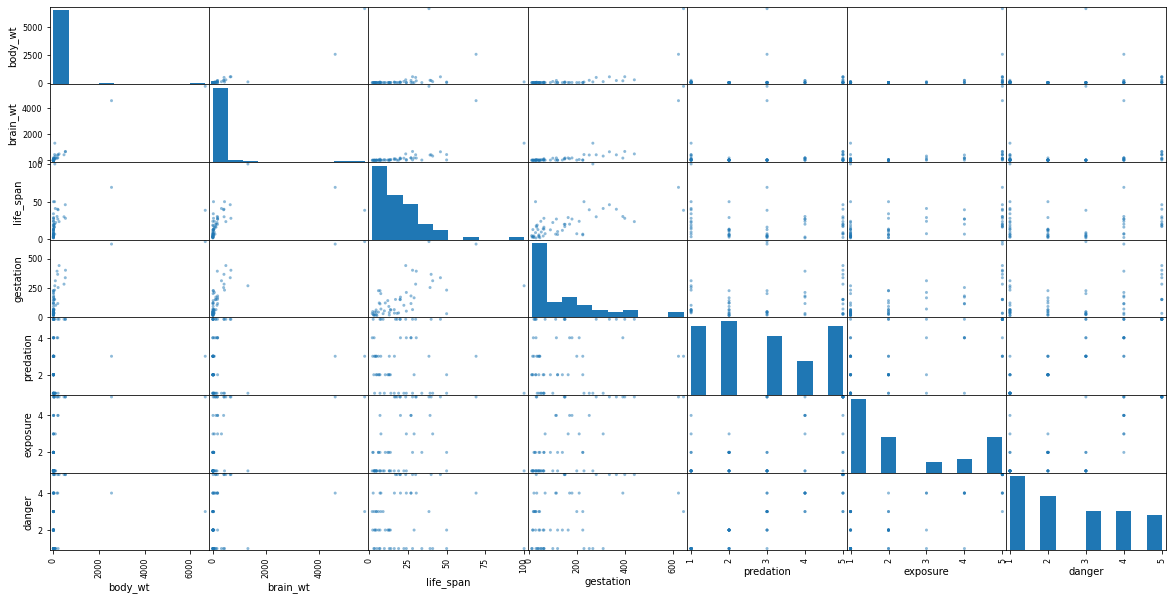

In [5]:
pd.plotting.scatter_matrix(df.iloc[:, 1:], figsize = (20, 10));

Based on this scatter matrix, we could see relatively clear that 'danger' is correlated with both 'exposure' and 'predation'. This is also explained by the dataset description that this index is based on the other two indexes. Therefore, we have to drop this column to avoid multicolinearity. 

In addition, 'life_span' also seems to be correlated with 'gestation'. After doing a brief search on the internet, many researches suggest that there is a positive correlation between these two variables. Therefore, we have to drop one of the column as well.

In [6]:
df[(df['life_span'].isnull()) | (df['gestation'].isnull())]

,total_sleep,body_wt,brain_wt,life_span,gestation,predation,exposure,danger
3,16.5,0.920,5.7,NaN,25.0,5,2,3
12,10.3,0.550,2.4,NaN,NaN,2,1,2
18,6.1,1.410,17.5,34.0,NaN,1,2,1
19,18.1,60.000,81.0,7.0,NaN,1,1,1
34,10.6,0.122,3.0,NaN,30.0,2,1,1
35,11.2,1.350,8.1,NaN,45.0,3,1,3
55,10.3,0.060,1.0,3.5,NaN,3,1,2


Since both variables have the same number of missing values, we will just randomly drop one column. We decide to drop the column 'life_span'.

In [7]:
df.drop(['life_span', 'danger'], axis = 1, inplace = True)
df

/opt/conda/lib/python3.9/site-packages/pandas/core/frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,total_sleep,body_wt,brain_wt,gestation,predation,exposure
0,3.3,6654.000,5712.0,645.0,3,5
1,8.3,1.000,6.6,42.0,3,1
2,12.5,3.385,44.5,60.0,1,1
3,16.5,0.920,5.7,25.0,5,2
4,3.9,2547.000,4603.0,624.0,3,5
...,...,...,...,...,...,...
57,5.4,2.000,12.3,200.0,3,1
58,15.8,0.104,2.5,46.0,3,2
59,10.3,4.190,58.0,210.0,4,3
60,19.4,3.500,3.9,14.0,2,1


The columns 'body_wt' and 'brain_wt' seems to be correlated as well. However, the correlation is not clear on the graph because the window of the previous plot is not appropriate for most of data that they concentrated on the corner of the graph. Also, the existence of the outliers can highly affect the correlation. We try to make a linear regression line without extreme values to see if there is a stronger relationship (a stronger slope) and window changes. So we decide to plot a new graph without the observations with extreme body weight. Since the two extreme values are around 2500 and 6500, we decide not to include values larger than 2000. After the window changes and slope change, the correlation would become much easier to see.

We are not dropping these two values but only exclude them from this plot temporarily. In the future, when we do the prediction, we will include them back into our model.

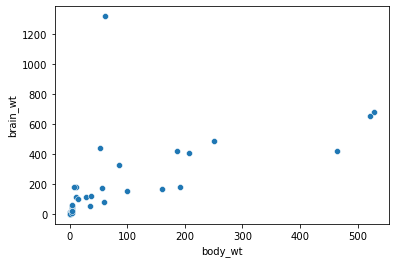

In [8]:
common_wt = df[df['body_wt'] <= 2000]
sns.scatterplot(x = 'body_wt', y = 'brain_wt', data = common_wt);

Even we see this graph again without the outliers, however, we are still very hard to see any correlations possible. As a result, we are going to calculate a p-value to see if there is more evidence to show a correlation.

In [9]:
outcome, predictors = patsy.dmatrices('body_wt ~ brain_wt', common_wt)
model = sm.OLS(outcome, predictors)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                body_wt   R-squared:                       0.423
Model:                            OLS   Adj. R-squared:                  0.413
Method:                 Least Squares   F-statistic:                     42.56
Date:                Fri, 10 Dec 2021   Prob (F-statistic):           1.84e-08
Time:                        12:24:58   Log-Likelihood:                -355.11
No. Observations:                  60   AIC:                             714.2
Df Residuals:                      58   BIC:                             718.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     10.9751     13.388      0.820      0.4

According to the regression results, if the brain weight is 0, body weight would be 10.9651. For every 1 unit increase in brain weight, it’s expected to see a 0.3406 unit increase in body weight. We can also see that the calculated p-value for brain weight is 0.000 which is less than than 0.001 and makes it statistically significant. We can conclude that brain weight and body weight are indeed highly correlated. Then we need to drop one of the two columns. Since one of the prior research claimed that body weight is related to the sleep time, we will drop 'brain_wt' to avoid multicolinearity.

In [10]:
df.drop(['brain_wt'], axis = 1, inplace = True)
df.head()

/opt/conda/lib/python3.9/site-packages/pandas/core/frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,total_sleep,body_wt,gestation,predation,exposure
0,3.3,6654.000,645.0,3,5
1,8.3,1.000,42.0,3,1
2,12.5,3.385,60.0,1,1
3,16.5,0.920,25.0,5,2
4,3.9,2547.000,624.0,3,5


Then we could check on the missing values and see what we can do for them.

In [11]:
df.isnull().sum()

total_sleep    4
body_wt        0
gestation      4
predation      0
exposure       0
dtype: int64

There are 4 observations without 'total_sleep', and since it's the depedent variable that we have to predict, we have no other choice but to drop these 4 observations.

In [12]:
df = df.dropna(subset = ['total_sleep'])
df.shape

(58, 5)

In [13]:
df.isnull().sum()

total_sleep    0
body_wt        0
gestation      4
predation      0
exposure       0
dtype: int64

Now we only have 4 missing values in 'gestation'.

As we've made sure all the predictors are not correlated with each other, and we don't want to lose any observations since we only have 58 observations right now, we will do a probabilistic imputation on 'gestation'. We will replace the missing value with 4 values randomly drawn from the current sample we have.

In [14]:
missing_index = df[df['gestation'].isna() == True].index
missing_index

Int64Index([12, 18, 19, 55], dtype='int64')

In [15]:
random_ges = df.dropna().sample(n = 4, replace = True).reset_index(drop = True)['gestation']
random_ges.index = missing_index
fill_ges = df['gestation'].fillna(random_ges)
df['gestation'] = fill_ges
df.isnull().sum()

/tmp/ipykernel_193/872129312.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['gestation'] = fill_ges


total_sleep    0
body_wt        0
gestation      0
predation      0
exposure       0
dtype: int64

In [16]:
df.head()

,total_sleep,body_wt,gestation,predation,exposure
0,3.3,6654.000,645.0,3,5
1,8.3,1.000,42.0,3,1
2,12.5,3.385,60.0,1,1
3,16.5,0.920,25.0,5,2
4,3.9,2547.000,624.0,3,5


# Data Analysis & Results

We are going to understand our data by Exploratory data analysis (EDA) per the standards of Data 100 Textbook: structure, granularity, scope, temporality, and faithfulness. 

First, we would look at our dataset:


In [17]:
df

,total_sleep,body_wt,gestation,predation,exposure
0,3.3,6654.000,645.0,3,5
1,8.3,1.000,42.0,3,1
2,12.5,3.385,60.0,1,1
3,16.5,0.920,25.0,5,2
4,3.9,2547.000,624.0,3,5
5,9.8,10.550,180.0,4,4
6,19.7,0.023,35.0,1,1
7,6.2,160.000,392.0,4,5
8,14.5,3.300,63.0,1,2
9,9.7,52.160,230.0,1,1


In [18]:
df.shape

(58, 5)

In [19]:
# check for basic information for each variable
df.describe()

,total_sleep,body_wt,gestation,predation,exposure
count,58.000000,58.000000,58.000000,58.000000,58.000000
mean,10.532759,198.395328,133.112069,2.793103,2.310345
std,4.606760,928.507308,136.252444,1.472063,1.535623
min,2.600000,0.005000,12.000000,1.000000,1.000000
25%,8.050000,0.497500,42.000000,2.000000,1.000000
50%,10.450000,2.750000,90.000000,2.500000,2.000000
75%,13.200000,34.162500,177.500000,4.000000,3.750000
max,19.900000,6654.000000,645.000000,5.000000,5.000000


Our data is formatted in CSV, each observation is in a separate row, and the total_sleep, body_weight, gestation variables are of type float while the predation and exposure variables are of type integer, and at last we currently have one single table for the data. Since the structure is clear, we don’t need further cleaning. 

## Univariate Analysis

Next, for granularity, each row of our data contain a summary about a number of individuals. 

As for scope, for each variable, we would first look at their distribution, and then plot the boxplot to check if there is any outliers inside. If there are outliers and the distribution is severely skewed, we would perform log transformation to see if the transformed distribution becomes normal.



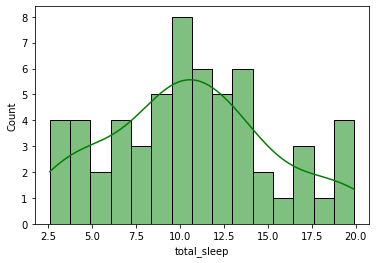

In [20]:
# plot the distribution of *total_sleep* in species
sns.histplot(df['total_sleep'], kde = True, bins = 15, color = 'green');

We can see our distribution for the total_sleep variable is an approxiamtely normal distribution. 

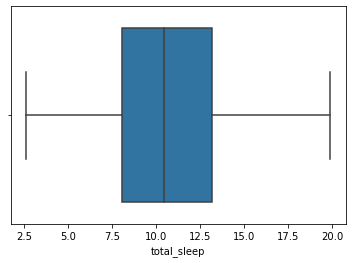

In [21]:
# plot if there are outliers for *total_sleep*
sns.boxplot(x = 'total_sleep', data = df);

The box plot shows that there is no outliers in total_sleep and the distribution is rather balanced, which corresponds to the histogram we draw above.

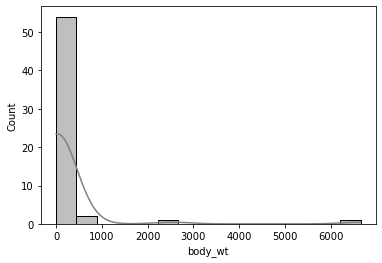

In [22]:
# plot the distribution of *body_wt* in species
sns.histplot(df['body_wt'], kde = True, bins = 15, color = 'grey');

It seems like we have a skewed distribution instead of a normal distribution. However, this might be contrinbuted by several huge outliers in this variable. We would then make a boxplot to see if there are outliers. 

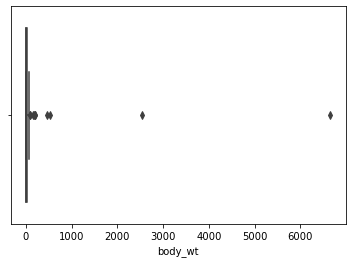

In [23]:
# plot if there are outliers for *body_wt*
sns.boxplot(x = 'body_wt', data = df);

From the boxplot, we can see that we are facing the same problems from before: there are a few outliers for our variable 'body_wt'. Thus, to make the plot pattern easier to see, we decided to make a plot without them temporary. We are going to use the same criteria to remove outliers by confining the obervation to be less than or equal to 2000. 

In [24]:
df_remove_outliers = df[df['body_wt'] <= 2000]

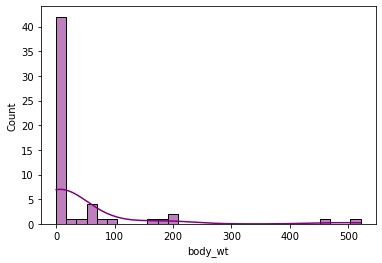

In [25]:
# plot the distribution of *body_wt* in species after outlier removal
sns.histplot(df_remove_outliers['body_wt'], kde = True, bins = 30, color = 'purple');

We can see that the data without extreme outliers is still not normal. However, we can log transformation the original data to present it in a bell curve shape.

In [26]:
# log transformation the variable *body_wt*
df['body_wt_log'] = np.log(df['body_wt'])

/tmp/ipykernel_193/257392375.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['body_wt_log'] = np.log(df['body_wt'])


In [27]:
df.head()

,total_sleep,body_wt,gestation,predation,exposure,body_wt_log
0,3.3,6654.000,645.0,3,5,8.802973
1,8.3,1.000,42.0,3,1,0.000000
2,12.5,3.385,60.0,1,1,1.219354
3,16.5,0.920,25.0,5,2,-0.083382
4,3.9,2547.000,624.0,3,5,7.842671


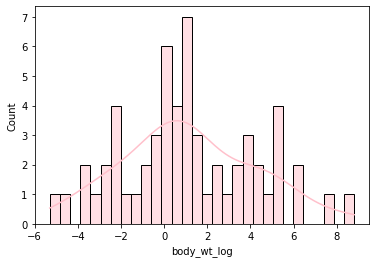

In [28]:
# plot the distribution of *body_wt* in species after log transformation
sns.histplot(df['body_wt_log'], kde = True, bins = 30, color = 'pink');

Now we have a normal distribution for our variable 'body_wt'.

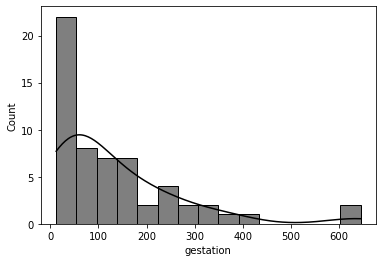

In [29]:
# plot the distribution of *gestation* in species
sns.histplot(df['gestation'], kde = True, bins = 15, color = 'black');

For this variable 'gestation', we have a skewed right distribution.

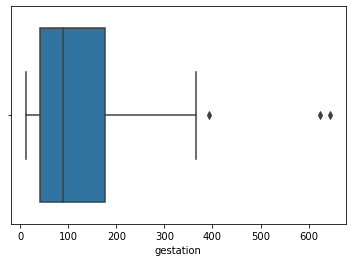

In [30]:
# plot if there are outliers for *gestation*
sns.boxplot(x = 'gestation', data = df);

The box plot shows that 'gestation' does have outliers in it. We can make a log transformation to make the distribution normal.

In [31]:
# do the log transformation to the variable *gestation*
df['gestation_log'] = np.log(df['gestation']);

/tmp/ipykernel_193/732173392.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['gestation_log'] = np.log(df['gestation']);


In [32]:
df.head()

,total_sleep,body_wt,gestation,predation,exposure,body_wt_log,gestation_log
0,3.3,6654.000,645.0,3,5,8.802973,6.469250
1,8.3,1.000,42.0,3,1,0.000000,3.737670
2,12.5,3.385,60.0,1,1,1.219354,4.094345
3,16.5,0.920,25.0,5,2,-0.083382,3.218876
4,3.9,2547.000,624.0,3,5,7.842671,6.436150


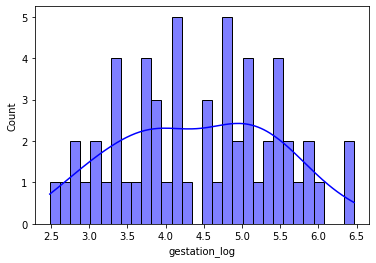

In [33]:
# plot the distribution of *gestation_log* in species after log transformation
sns.histplot(df['gestation_log'], kde = True, bins = 30, color = 'blue');

Now we have a normal distribution for our variable 'gestation'.

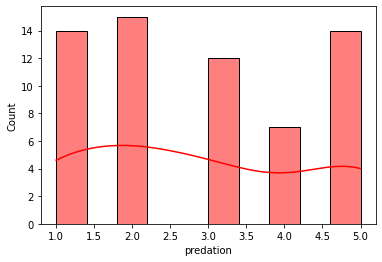

In [34]:
# plot the distribution of *predation* in species
sns.histplot(dataset['predation'], kde = True, bins = 10, color = 'red');

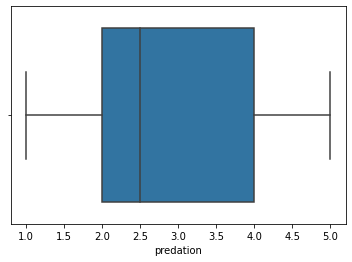

In [35]:
# plot if there are outliers for *predation*
sns.boxplot(x = 'predation', data = df);

From the diagram, we can see the boxlpot has no outlier for predation.

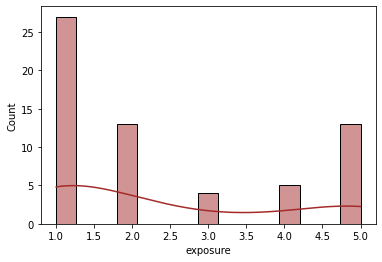

In [36]:
# plot the distribution of *exposure* in species
sns.histplot(dataset['exposure'], kde = True, bins = 15, color = 'brown');

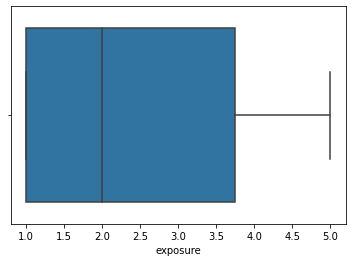

In [37]:
# plot if there are outliers for *exposure*
sns.boxplot(x = 'exposure', data = df);

From the diagram, we can see that although most data centered at 1.0 & 2.0, exposure still deos not have any outlier in it.

Both variable 'predation' and variable 'exposure' show no outliers. Since they are categorical variables, we do not need to perform log transformations on them.

We will drop two original columns before log transformation and keep the two transformed columns in the dataset.

In [38]:
df = df.reset_index(drop = True)
df = df.drop(columns = ['body_wt', 'gestation'])
df.head()

,total_sleep,predation,exposure,body_wt_log,gestation_log
0,3.3,3,5,8.802973,6.469250
1,8.3,3,1,0.000000,3.737670
2,12.5,1,1,1.219354,4.094345
3,16.5,5,2,-0.083382,3.218876
4,3.9,3,5,7.842671,6.436150


## Bivariate analysis

To examine relationships between independent variables, we would refer back to our scattermatrix analysis previosuly. By plotting a scattermatrix that visualizes bivariate relationships between different combinations of independent variables, we saw multicollinearlity between several variables and dropped the columns to fix the issue. Therefore, each independent variable is now uncorrelated with each other. 
We would then focus our analysis on the relationship between each indipendent variable and the dependent variable in the later part.

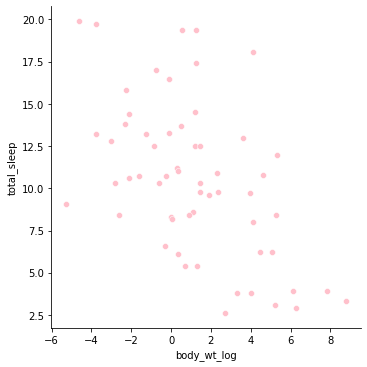

In [39]:
# plot scatterplot of *body_wt_log* and *total_sleep*
sns.relplot(x="body_wt_log", y="total_sleep", data=df, color= 'pink');

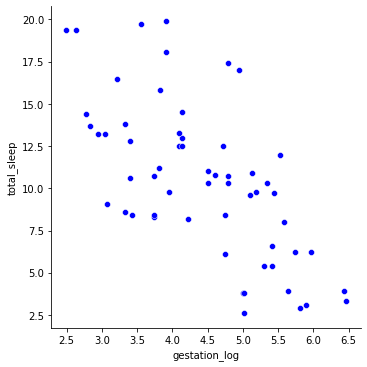

In [40]:
# plot scatterplot of *gestation_log* and *total_sleep*
sns.relplot(x="gestation_log", y="total_sleep", data=df, color= 'blue');

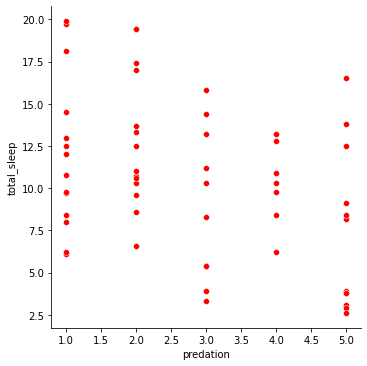

In [41]:
# plot scatterplot of *predation* and *total_sleep*
sns.relplot(x="predation", y="total_sleep", data=df, color= 'red');

Because the data from columns: 'predation' and 'exposure' are in a likert rating format, these two scatterplots do not take the form of a regular scatterplot. 

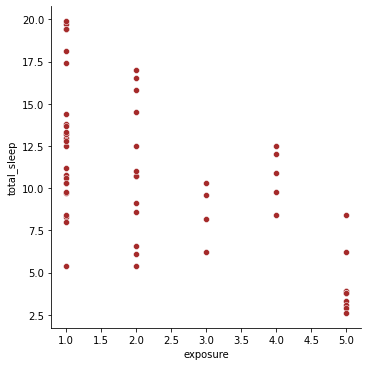

In [42]:
# plot scatterplot of *exposure* and *total_sleep*
sns.relplot(x="exposure", y="total_sleep", data=df, color= 'brown');

For each independent variable, it shows a linear correlation with the dependent variable. This should be a good news for us to further perform linear regression on the dataset.

As for temporality, since no time information is recorded, we don’t need to change or drop any misused time-related information. Our data is generally reasonable since it does not contain nonexistent values nor inconsistencies across tables. We've checked the distribution and outliners for each variable, log transform them if necessary, and checked the bivariant relationship between each independent variable and the dependent variable. Thus, we conclude our EDA analysis by examining the varying properties of our data. Now we have a more complete understanding of our data.  

# Analysis

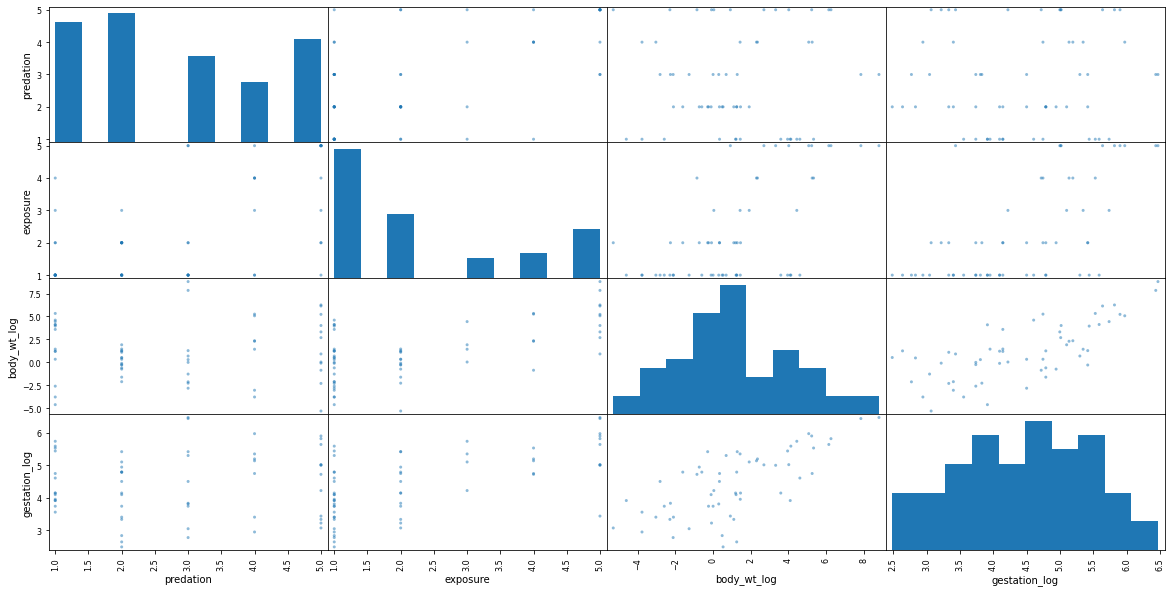

In [43]:
pd.plotting.scatter_matrix(df.iloc[:, 1:], figsize = (20, 10));

## Feature combination - 15 models

Now we will start analyzing our data. In order to see whether predation is the best predictor, we will examine the average coefficient, average p-values, and average contribution to Adjusted R-squared of predation versus other predictors across models with all possible feature combinations. 

Here are the four remaining variables we have after data cleaning. By looking at the scatter matrix, we could see that the body weight after log transformation is still correlated with gestation after log transformation. However, since we only have 4 remaining features, we could analyze all feature combinations and then decide which one of them to drop to avoid the problem of multicollinearity.

- predation
- exposure
- body_wt_log
- gestation_log

We are going to have a total of 15 feature combinations as listed below:

1. predation

2. exposure

3. body_wt_log

4. gestation_log

5. predation + exposure

6. predation + body_wt_log

7. predation + gestation_log

8. predation + exposure + body_wt_log

9. predation + body_wt_log + gestation_log

10. predation + exposure + gestation_log

11. predation + exposure + body_wt_log + gestation_log

12. exposure + body_wt_log

13. exposure + gestation_log

14. exposure + body_wt_log + gestation_log

15. body_wt_log + gestation_log

In [44]:
df.head()

,total_sleep,predation,exposure,body_wt_log,gestation_log
0,3.3,3,5,8.802973,6.469250
1,8.3,3,1,0.000000,3.737670
2,12.5,1,1,1.219354,4.094345
3,16.5,5,2,-0.083382,3.218876
4,3.9,3,5,7.842671,6.436150


In [45]:
df.shape

(58, 5)

In order to compare the importance of the predictors by looking at their coefficients, we have to standardize them first. Since the dependent variable, total_sleep, does not need to be standardized as well, we first split the dataset into X with all the predictors and Y with only total_sleep.

In [46]:
X = df[['predation', 'exposure', 'body_wt_log', 'gestation_log']]
Y = df['total_sleep']

In [47]:
scaler = preprocessing.StandardScaler().fit(X)

We are naming the standardized X variable X_scaled:

In [48]:
X_scaled = scaler.transform(X)

Then, we combine it with the total_sleep to have the overall standardized dataset.

In [49]:
scaled_df = pd.DataFrame(X_scaled, columns = ['predation', 'exposure', 'body_wt_log', 'gestation_log'])
scaled_df['total_sleep'] = Y
scaled_df.head()

,predation,exposure,body_wt_log,gestation_log,total_sleep
0,0.141776,1.766805,2.497250,2.048661,3.3
1,0.141776,-0.860751,-0.371902,-0.685239,8.3
2,-1.228727,-0.860751,0.025522,-0.328261,12.5
3,1.512280,-0.203862,-0.399079,-1.204474,16.5
4,0.141776,1.766805,2.184259,2.015533,3.9


## First Approach: Coefficient & P-values

Our first approach to analyze our data is to do 15 linear regression models based on all the feature combinations. Then, we will check on the coefficients and the p-values of each variable across all models. The coefficients represent how much the change in that predictos would lead to the cause in total_sleep. Since the predictors are standardized, these coefficient between predictors could now be compared. Using 0.05 as the boundary, the p-values show the confidence of having a non-zero coefficient as reported by the model. Therefore, having a large absolute value in coefficient and a low p-value give us evidence to say the predictor is significant in prediction.

To address the problem of having a small dataset, we will conduct bootstrapping for a total of 100 iterations in order to get the averaged statistics which are more reliable then the statistics calculated based on the original dataset alone.

In [50]:
idx_range = scaled_df.shape[0]
np.random.choice(idx_range, idx_range)

array([16, 28, 42, 32,  5, 43, 33,  4,  8,  2, 13,  3, 13, 33, 43, 12,  2,
       14, 24, 42, 11, 32,  9, 36,  5, 22, 30, 27, 41, 27,  9, 55, 31,  8,
       38, 12, 50, 20, 24, 57, 40, 27,  6,  0, 47, 51, 29, 20,  6,  2, 17,
       40, 11,  4, 38, 41, 16,  9])

In [51]:
resample_idx = []
idx_range = scaled_df.shape[0]
for i in range(100):
    idx = np.random.choice(idx_range, idx_range)
    resample_idx.append(idx)

We are going to conduct linear regressions and store the resulting coefficients and p-values of the model in this format:  mod1_coef, mod1_pval.
 
#### 1. predation

In [52]:
mod1_coef = []
mod1_pval = []
for idx in resample_idx:
    data = scaled_df.iloc[idx]
    outcome, predictors = patsy.dmatrices('total_sleep ~ predation', data)
    model = sm.OLS(outcome, predictors)
    results = model.fit()
    #print(results.summary())
    
    mod1_coef.append(results.params[1:])
    mod1_pval.append(results.pvalues[1:])

np.mean(mod1_coef, axis = 0) , np.mean(mod1_pval, axis = 0)

(array([-1.80866027]), array([0.03079415]))

#### 2. exposure

In [53]:
mod2_coef = []
mod2_pval = []
for idx in resample_idx:
    data = scaled_df.iloc[idx]
    outcome, predictors = patsy.dmatrices('total_sleep ~ exposure', data)
    model = sm.OLS(outcome, predictors)
    results = model.fit()
    #print(results.summary())
    
    mod2_coef.append(results.params[1:])
    mod2_pval.append(results.pvalues[1:])

np.mean(mod2_coef, axis = 0) , np.mean(mod2_pval, axis = 0)

(array([-2.95476308]), array([4.14521932e-05]))

#### 3. body_wt_log

In [54]:
mod3_coef = []
mod3_pval = []
for idx in resample_idx:
    data = scaled_df.iloc[idx]
    outcome, predictors = patsy.dmatrices('total_sleep ~ body_wt_log', data)
    model = sm.OLS(outcome, predictors)
    results = model.fit()
    #print(results.summary())
    
    mod3_coef.append(results.params[1:])
    mod3_pval.append(results.pvalues[1:])

np.mean(mod3_coef, axis = 0) , np.mean(mod3_pval, axis = 0)

(array([-2.43188784]), array([0.00123057]))

#### 4. gestation_log

In [55]:
mod4_coef = []
mod4_pval = []
for idx in resample_idx:
    data = scaled_df.iloc[idx]
    outcome, predictors = patsy.dmatrices('total_sleep ~ gestation_log', data)
    model = sm.OLS(outcome, predictors)
    results = model.fit()
    #print(results.summary())
    
    mod4_coef.append(results.params[1:])
    mod4_pval.append(results.pvalues[1:])

np.mean(mod4_coef, axis = 0) , np.mean(mod4_pval, axis = 0)

(array([-3.04375287]), array([3.50740149e-06]))

#### 5. predation + exposure

In [56]:
mod5_coef = []
mod5_pval = []
for idx in resample_idx:
    data = scaled_df.iloc[idx]
    outcome, predictors = patsy.dmatrices('total_sleep ~ predation + exposure', data)
    model = sm.OLS(outcome, predictors)
    results = model.fit()
    #print(results.summary())
    
    mod5_coef.append(results.params[1:])
    mod5_pval.append(results.pvalues[1:])

np.mean(mod5_coef, axis = 0) , np.mean(mod5_pval, axis = 0)

(array([-0.07492101, -2.90902071]), array([4.77738439e-01, 4.67036279e-04]))

#### 6. predation + body_wt_log

In [57]:
mod6_coef = []
mod6_pval = []
for idx in resample_idx:
    data = scaled_df.iloc[idx]
    outcome, predictors = patsy.dmatrices('total_sleep ~ predation + body_wt_log', data)
    model = sm.OLS(outcome, predictors)
    results = model.fit()
    #print(results.summary())
    
    mod6_coef.append(results.params[1:])
    mod6_pval.append(results.pvalues[1:])

np.mean(mod6_coef, axis = 0) , np.mean(mod6_pval, axis = 0)

(array([-1.66545501, -2.34895365]), array([0.01501687, 0.00030979]))

#### 7. predation + gestation_log

In [58]:
mod7_coef = []
mod7_pval = []
for idx in resample_idx:
    data = scaled_df.iloc[idx]
    outcome, predictors = patsy.dmatrices('total_sleep ~ predation + gestation_log', data)
    model = sm.OLS(outcome, predictors)
    results = model.fit()
    #print(results.summary())
    
    mod7_coef.append(results.params[1:])
    mod7_pval.append(results.pvalues[1:])

np.mean(mod7_coef, axis = 0) , np.mean(mod7_pval, axis = 0)

(array([-1.57079719, -2.90213059]), array([8.01902329e-03, 3.05219572e-06]))

#### 8. predation + exposure + body_wt_log

In [59]:
mod8_coef = []
mod8_pval = []
for idx in resample_idx:
    data = scaled_df.iloc[idx]
    outcome, predictors = patsy.dmatrices('total_sleep ~ predation + exposure + body_wt_log', data)
    model = sm.OLS(outcome, predictors)
    results = model.fit()
    #print(results.summary())
    
    mod8_coef.append(results.params[1:])
    mod8_pval.append(results.pvalues[1:])

np.mean(mod8_coef, axis = 0) , np.mean(mod8_pval, axis = 0)

(array([-0.77212685, -1.59110393, -1.4083894 ]),
 array([0.31369996, 0.1649826 , 0.14680454]))

#### 9. predation + body_wt_log + gestation_log

In [60]:
mod9_coef = []
mod9_pval = []
for idx in resample_idx:
    data = scaled_df.iloc[idx]
    outcome, predictors = patsy.dmatrices('total_sleep ~ predation + body_wt_log + gestation_log', data)
    model = sm.OLS(outcome, predictors)
    results = model.fit()
    #print(results.summary())
    
    mod9_coef.append(results.params[1:])
    mod9_pval.append(results.pvalues[1:])

np.mean(mod9_coef, axis = 0) , np.mean(mod9_pval, axis = 0)

(array([-1.55436048, -0.67324499, -2.40913149]),
 array([0.00839314, 0.36313289, 0.0184064 ]))

#### 10. predation + exposure + gestation_log

In [61]:
mod10_coef = []
mod10_pval = []
for idx in resample_idx:
    data = scaled_df.iloc[idx]
    outcome, predictors = patsy.dmatrices('total_sleep ~ predation + exposure + gestation_log', data)
    model = sm.OLS(outcome, predictors)
    results = model.fit()
    #print(results.summary())
    
    mod10_coef.append(results.params[1:])
    mod10_pval.append(results.pvalues[1:])

np.mean(mod10_coef, axis = 0) , np.mean(mod10_pval, axis = 0)

(array([-1.2222866 , -0.61683031, -2.54684544]),
 array([0.13504468, 0.41445095, 0.00710487]))

#### 11. predation + exposure + body_wt_log + gestation_log

In [62]:
mod11_coef = []
mod11_pval = []
for idx in resample_idx:
    data = scaled_df.iloc[idx]
    outcome, predictors = patsy.dmatrices('total_sleep ~ predation + exposure + body_wt_log + gestation_log', data)
    model = sm.OLS(outcome, predictors)
    results = model.fit()
    #print(results.summary())
    
    mod11_coef.append(results.params[1:])
    mod11_pval.append(results.pvalues[1:])

np.mean(mod11_coef, axis = 0) , np.mean(mod11_pval, axis = 0)

(array([-1.3818166 , -0.29762741, -0.55062974, -2.32240394]),
 array([0.11626628, 0.48481634, 0.39673457, 0.0315318 ]))

#### 12. exposure + body_wt_log

In [63]:
mod12_coef = []
mod12_pval = []
for idx in resample_idx:
    data = scaled_df.iloc[idx]
    outcome, predictors = patsy.dmatrices('total_sleep ~ exposure + body_wt_log', data)
    model = sm.OLS(outcome, predictors)
    results = model.fit()
    #print(results.summary())
    
    mod12_coef.append(results.params[1:])
    mod12_pval.append(results.pvalues[1:])

np.mean(mod12_coef, axis = 0) , np.mean(mod12_pval, axis = 0)

(array([-2.29582559, -1.02776905]), array([0.00560762, 0.20899736]))

#### 13. exposure + gestation_log

In [64]:
mod13_coef = []
mod13_pval = []
for idx in resample_idx:
    data = scaled_df.iloc[idx]
    outcome, predictors = patsy.dmatrices('total_sleep ~ exposure + gestation_log', data)
    model = sm.OLS(outcome, predictors)
    results = model.fit()
    #print(results.summary())
    
    mod13_coef.append(results.params[1:])
    mod13_pval.append(results.pvalues[1:])

np.mean(mod13_coef, axis = 0) , np.mean(mod13_pval, axis = 0)

(array([-1.70401206, -1.97912326]), array([0.03045265, 0.01762036]))

#### 14. exposure + body_wt_log + gestation_log

In [65]:
mod14_coef = []
mod14_pval = []
for idx in resample_idx:
    data = scaled_df.iloc[idx]
    outcome, predictors = patsy.dmatrices('total_sleep ~ exposure + body_wt_log + gestation_log', data)
    model = sm.OLS(outcome, predictors)
    results = model.fit()
    #print(results.summary())
    
    mod14_coef.append(results.params[1:])
    mod14_pval.append(results.pvalues[1:])

np.mean(mod14_coef, axis = 0) , np.mean(mod14_pval, axis = 0)

(array([-1.68281798, -0.04635679, -1.94114251]),
 array([0.04481732, 0.39967855, 0.06160679]))

#### 15. body_wt_log + gestation_log

In [66]:
mod15_coef = []
mod15_pval = []
for idx in resample_idx:
    data = scaled_df.iloc[idx]
    outcome, predictors = patsy.dmatrices('total_sleep ~ body_wt_log + gestation_log', data)
    model = sm.OLS(outcome, predictors)
    results = model.fit()
    #print(results.summary())
    
    mod15_coef.append(results.params[1:])
    mod15_pval.append(results.pvalues[1:])

np.mean(mod15_coef, axis = 0) , np.mean(mod15_pval, axis = 0)

(array([-0.66455264, -2.54448448]), array([0.36803991, 0.01671841]))

Although body_wt_log has a p-value lower than 0.05 on its own (model 3), all the models that contain gestation_log have p-values that rise above 0.05 while the absolute value of the coefficients fall. At the same time, the p-values of gestation_log remain under 0.05 with larger absolute value of coefficients compared to body_wt_log. Based on this observation, we decide to drop body_wt_log instead of gestation_log to solve the problem of multicollinearity. 

After deleting body_wt_log from our predictors, we are left with 7 models:

1. predation


2. exposure


4. gestation_log


5. predation + exposure


7. predation + gestation_log


10. predation + exposure + gestation_log


13. exposure + gestation_log

Whereas the related model for each three variables are:

- Predation: [1, 5, 7, 10]
- Exposure: [2, 5, 10, 13]
- Gestation_log: [4, 7, 10, 13]

Then we extract the data for predation, exposure, and gestation from the related models and calculate the average coefficients and p-values for each. 


In [67]:
predation_coef = np.concatenate(([x[0] for x in mod1_coef], 
                                 [x[0] for x in mod5_coef],
                                 [x[0] for x in mod7_coef],
                                 [x[0] for x in mod10_coef]), axis = None)
predation_pval = np.concatenate(([x[0] for x in mod1_pval], 
                                 [x[0] for x in mod5_pval],
                                 [x[0] for x in mod7_pval],
                                 [x[0] for x in mod10_pval]), axis = None)
np.mean(predation_coef), np.mean(predation_pval)

(-1.1691662656813213, 0.16289907118897076)

In [68]:
exposure_coef = np.concatenate(([x[0] for x in mod2_coef], 
                                [x[1] for x in mod5_coef],
                                [x[1] for x in mod10_coef],
                                [x[0] for x in mod13_coef]), axis = None)
exposure_pval = np.concatenate(([x[0] for x in mod2_pval], 
                                [x[1] for x in mod5_pval],
                                [x[1] for x in mod10_pval],
                                [x[0] for x in mod13_pval]), axis = None)
np.mean(exposure_coef), np.mean(exposure_pval)

(-2.0461565416898924, 0.11135302195190869)

In [69]:
gestation_coef = np.concatenate(([x[0] for x in mod4_coef], 
                                 [x[1] for x in mod7_coef],
                                 [x[2] for x in mod10_coef],
                                 [x[1] for x in mod13_coef]), axis = None)
gestation_pval = np.concatenate(([x[0] for x in mod4_pval], 
                                 [x[1] for x in mod7_pval],
                                 [x[2] for x in mod10_pval],
                                 [x[1] for x in mod13_pval]), axis = None)
np.mean(gestation_coef), np.mean(gestation_pval)

(-2.6179630408515164, 0.0061829464308617256)

We now have the average coefficients and p-values for the three predictors for all 7 models over 100 iterations.

Based on the result, we could see that predation has the highest average p-value which also shows us the potential insignificance of predation. It also has the smallest absolute value for coefficient. The two statistics suggest that we don’t have sufficient evidence to tell that predation is the strongest predictor, and our hypothesis is incorrect.



### Second Approach - Adjusted $R^2$

To further validate our result, we are going to use Adjusted R-squared for our additional approach. We are using Adjusted R-squared because it describes how much variance is explained by the model based on the number of predictors we have. Therefore, if it is not changing, we can conclude that the newly added predictor is not useful.

For this approach, we are using the original dataset and retrieve the Adjusted R-squared for all 7 models left after removing body_wt_log. Then, for each predictor, we calculate the sum of all deviance from the original Adjusted R-squared to the new Adjusted R-squared after the predictor comes in. 

In [70]:
scaled_df.head()

,predation,exposure,body_wt_log,gestation_log,total_sleep
0,0.141776,1.766805,2.497250,2.048661,3.3
1,0.141776,-0.860751,-0.371902,-0.685239,8.3
2,-1.228727,-0.860751,0.025522,-0.328261,12.5
3,1.512280,-0.203862,-0.399079,-1.204474,16.5
4,0.141776,1.766805,2.184259,2.015533,3.9


1. predation
2. exposure
3. gestation
4. predation + exposure
5. predation + gestation
6. exposure + gestation
7. predation + exposure + gestation

In [71]:
# predation
outcome, predictors = patsy.dmatrices('total_sleep ~ predation', scaled_df)
model = sm.OLS(outcome, predictors)
results = model.fit()
r_p = results.rsquared_adj

# exposure
outcome, predictors = patsy.dmatrices('total_sleep ~ exposure', scaled_df)
model = sm.OLS(outcome, predictors)
results = model.fit()
r_e = results.rsquared_adj

# gestation
outcome, predictors = patsy.dmatrices('total_sleep ~ gestation_log', scaled_df)
model = sm.OLS(outcome, predictors)
results = model.fit()
r_g = results.rsquared_adj

# predation + exposure
outcome, predictors = patsy.dmatrices('total_sleep ~ predation + exposure', scaled_df)
model = sm.OLS(outcome, predictors)
results = model.fit()
r_pe = results.rsquared_adj

# predation + gestation
outcome, predictors = patsy.dmatrices('total_sleep ~ predation + gestation_log', scaled_df)
model = sm.OLS(outcome, predictors)
results = model.fit()
r_pg = results.rsquared_adj

# exposure + gestation
outcome, predictors = patsy.dmatrices('total_sleep ~ exposure + gestation_log', scaled_df)
model = sm.OLS(outcome, predictors)
results = model.fit()
r_eg = results.rsquared_adj

# predation + exposure + gestation
outcome, predictors = patsy.dmatrices('total_sleep ~ predation + exposure + gestation_log', scaled_df)
model = sm.OLS(outcome, predictors)
results = model.fit()
r_peg = results.rsquared_adj


For each predictor, it could be added to three models to become a new model. Then, we calculate the mean Adjusted R-squared increases to examine how significant each predictor is, and store them into predation_r, exposure_r, and gestation_r. 

**Predation:**
- exposure & predation
- gestation_log & predation
- exposure + gestation_log & predation

In [72]:
predation_r = np.array([(r_pe - r_e), (r_pg - r_g), (r_peg - r_eg)])
predation_rmean = np.mean(predation_r)
predation_rmean

0.041582880542039735

**Exposure:**
- predation & exposure
- gestation_log & exposure
- predation + gestation_log & exposure

In [73]:
exposure_r = np.array([(r_pe - r_p), (r_eg - r_p), (r_peg - r_pg)])
exposure_rmean = np.mean(exposure_r)
exposure_rmean

0.20424775417426336

In [74]:
exposure_r

array([ 0.24965567,  0.36454846, -0.00146087])

**Gestation:**
- predation & gestation_log
- exposure & gestation_log
- predation + exposure & gestation_log

In [75]:
gestation_r = np.array([(r_pg - r_p), (r_eg - r_e), (r_peg - r_pe)])
gestation_rmean = np.mean(gestation_r)
gestation_rmean

0.21266336486369256

Comparing the three values, adding the predation shows the lowest increase on the Adjusted R-squared. This indicates that predation plays the smallest role in predicting the sleep_time (dependent variable), which suggests that our hypothesis was incorrect like in approach 1.

## Overall

To see our final result more clearly, we placed the three variables and avg_coef, avg_pva, and adj_r_increase into one table.


In [76]:
statistics = pd.DataFrame({'avg_coef': [predation_coef.mean(), exposure_coef.mean(), gestation_coef.mean()], 
                           'avg_pval': [predation_pval.mean(), exposure_pval.mean(), gestation_pval.mean()], 
                           'adj_r_increase': [predation_rmean, exposure_rmean, gestation_rmean]},
                          index = ['Predation', 'Exposure', 'Gestation'])
statistics

,avg_coef,avg_pval,adj_r_increase
Predation,-1.169166,0.162899,0.041583
Exposure,-2.046157,0.111353,0.204248
Gestation,-2.617963,0.006183,0.212663


According to this table, we can conclude that the predation variable has the smallest absolute value average coefficient and the highest average p-value. We can also see that it has the lowest Adjusted R-squared value, which means combining predation with other features is not useful for our prediction. As a result, we can conclude that both the first approach, Coefficients & P-values, and the second approach, Adjusted R-squared, indicate that we don’t have enough evidence to support our hypothesis that predation is the strongest predictor of sleeping time.  

Text(0, 0.5, 'Coefficient')

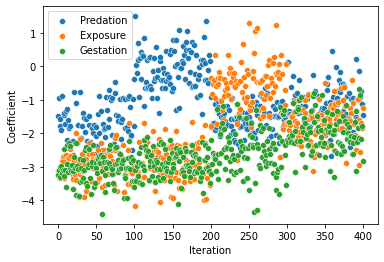

In [77]:
sns.scatterplot(x = [i for i in range(400)], y = predation_coef)
sns.scatterplot(x = [i for i in range(400)], y = exposure_coef)
sns.scatterplot(x = [i for i in range(400)], y = gestation_coef)
plt.legend(labels = ['Predation', 'Exposure', 'Gestation'])
plt.xlabel('Iteration')
plt.ylabel('Coefficient')

From this graph, we could see that predation is centered around zero.

Text(0, 0.5, 'P-values')

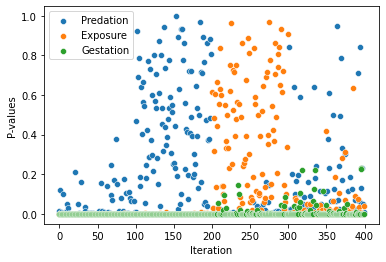

In [80]:
sns.scatterplot(x = [i for i in range(400)], y = predation_pval)
sns.scatterplot(x = [i for i in range(400)], y = exposure_pval)
sns.scatterplot(x = [i for i in range(400)], y = gestation_pval)
plt.legend(labels = ['Predation', 'Exposure', 'Gestation'])
plt.xlabel('Iteration')
plt.ylabel('P-values')

From this graph, we could see that the p-values for predation do not differ very much from exposure, but they are much higher on average comparing to gestation.

<AxesSubplot:>

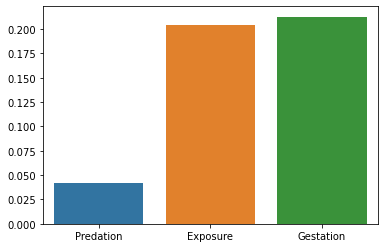

In [81]:
sns.barplot(x = ['Predation', 'Exposure', 'Gestation'], y = [predation_rmean, exposure_rmean, gestation_rmean])
plt.ylable('Avedj. R-suqared increase')

From this graph, we could see that the average increase in adj. $R^2$ is much lower than both exposure and gestation.

# Ethics & Privacy

All of our data and background information are sourced from authoritative websites and journals. Our dataset is obtained from Kaggle.com, a public database for the data science and machine learning discipline. The website has filtered permissions of use and thus the data are not under privacy concerns. Reference 1 is sourced from Plos Computational Biology, a monthly peer-reviewed open access scientific journal that was published by Public Library of Science in association with the International Society for Computational Biology. Reference 2 is sourced from the journal Animal Behaviour, which is published for the Association for the Study of Animal Behaviour in collaboration with the Animal Behavior Society and ranks high on the impact factor of Zoology. Reference 3 is sourced from US National Library of Medicine National Institute of Health. Therefore, we can safely assume that our sources are authoritative and the information we use are open-access and free of ethics and privacy concerns. 

The dataset we have selected does not contain personal identifiers and other private information. It contains information about the physical and behavioral properties of the animals. Because we are only utilizing data about the animals, there will not be an interaction with the animals. The data are empirical and objective therefore there are not any biases. There is not any informed consent to be given as the data are collected from animals that cannot give consent. We can also assume that all research and analyses were done under ethical considerations.

# Conclusion & Discussion

In this study, we explored mammalian sleeping time and its correlations with many mammal properties such as body weight, brain weight, life span, gestation, predation, exposure, and danger. Having conducted preliminary research, we hypothesized that the predation variable would most strongly predict mammalian sleeping time. To determine whether this hypothesis is correct, we first conducted some Data Cleaning where we dropped columns with null values as well as columns that encountered the multicollinearity issue. Next, to understand our dataset more comprehensively, we performed Exploratory Data Analysis (EDA) per the standards of the Data 100 textbook. After we checked the distribution and outliers for each variable, conducted log transforms, and checked the univariate and bivariate relationship between the variables, we moved on to the Analysis part. According to the two approaches we utilized above, we found that the predation variable has the smallest absolute value average coefficient, the highest average p-value, and the lowest Adjusted R-squared. We came to the conclusion that predation is not actually the strongest predictor of sleeping time. 

We acknowledge the limitation that we have a relatively small dataset with (62 observations before cleaning and 58 after cleaning). The dataset is also very unique so we cannot find any similar dataset to join with it. The variables predation, exposure, and danger are recorded ordinally; it is difficult to find additional data outside of our dataset that include them. If there are larger datasets that contain mammalian properties and total sleeping time similar to our dataset, we would be less limited in exploring the significance of predictors by building more reliable models.

We also choose to do linear regression models partially because of the small size of the dataset. Even if it's possible that the predictors are having non-linear relationship with the total_sleep, we would still build linear regression models to avoid over-fitting. It's also possible that the predictors are having interactions between each other, however, after passing the interaction terms in, none of them has a significant p-value that is lower than 0.05, so we exclude them afterwards in the final models.

# Team Contributions

- Chia-yu Chang
    - Verbal explanation (All), Visualized graph (EDA), Presentation
<br>
- Cecilia Liu
    - Code (All), Visualized graph (All), Presentation
<br>
- Hannah Lin
    - Verbal Explanation (Data Cleaning), Visualized graph (EDA), Presentation
<br>
- Jinyu Rao
    - Visualized graph (EDA), Code (Analysis), Verbal explanation (EDA), Presentation
<br>
- Lanzhuo Wu
    - Code (Analysis), Verbal explanation (EDA), Visualized graph (EDA), Presentation